In [1]:
import pandas as pd
import numpy as np

from rigaku_smartlab.dataset import pseudo_voigt, reciprocal_space_map

Omega: 18.03, Two Theta: 36.05, Beta: 0.12


/Users/josefmtd/miniconda3/envs/rigaku_smartlab/lib/python3.12/site-packages/uncertainties/core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")


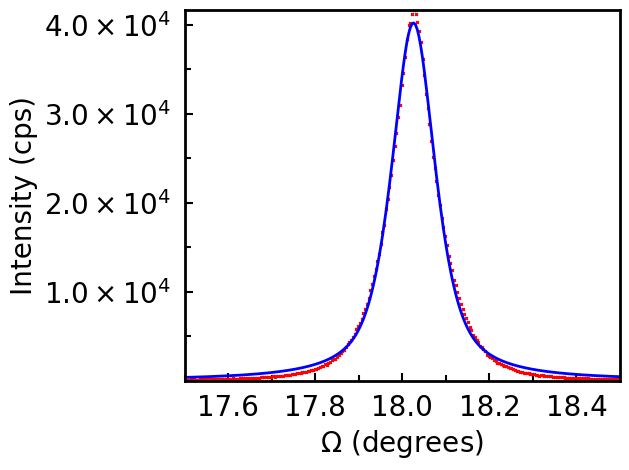

In [2]:
aln_fit = pseudo_voigt(
    '../data/raw/HRXRD_AlN_0002.ras',
    verbose = True, plot = True,
    xlim = (17.5, 18.5)
)

                   int      int      int      int      int       int  \
TwoThetaOmega                                                          
34.5528        16.5720  15.5513  22.7214  19.5862  29.2312   36.1623   
34.5728        29.3367  20.5603  20.6387  34.3189  36.3316   48.7022   
34.5928        21.7568  23.7515  26.0764  41.4798  46.4328   45.5551   
34.6128        27.8091  41.5382  43.4899  44.5308  80.8409  100.3897   
34.6328        44.2636  57.1135  53.0242  71.6074  99.3697  105.6723   
...                ...      ...      ...      ...      ...       ...   
37.4728         0.0000   0.0000   0.0000   1.0454   0.0000    1.0823   
37.4928         0.0000   1.0377   1.0038   0.0000   0.0000    0.0000   
37.5128         0.0000   0.0000   0.0000   0.0000   1.0457    0.0000   
37.5328         0.0000   0.0000   1.0395   0.0000   1.0249    1.0348   
37.5528         0.0000   1.0528   0.0000   0.0000   0.0000    0.0000   

                    int       int       int       int  ...     

/Users/josefmtd/Documents/GitHub/rigaku_smartlab/rigaku_smartlab/dataset.py:177: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  im = plt.imshow(df.values, extent = extent, aspect = 'auto', origin = 'lower',
/Users/josefmtd/Documents/GitHub/rigaku_smartlab/rigaku_smartlab/dataset.py:191: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(ylim if ylim else (df.columns.min(), df.columns.max()))


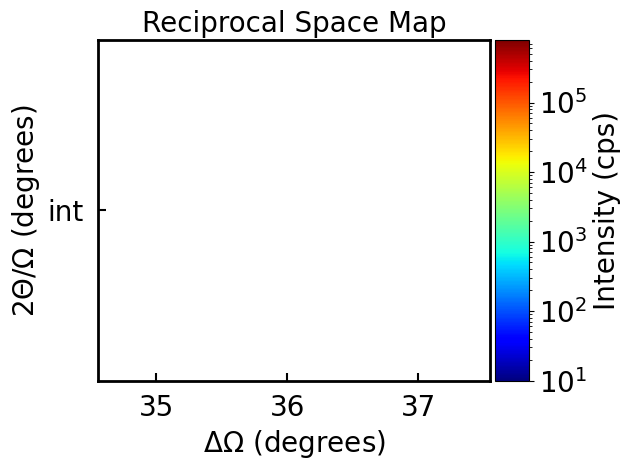

,int,int,int,int,int,int,int,int,int,int,...,int,int,int,int,int,int,int,int,int,int
TwoThetaOmega,,,,,,,,,,,,,,,,,,,,,
34.5528,16.5720,15.5513,22.7214,19.5862,29.2312,36.1623,39.5486,48.6650,71.6386,86.2036,...,147.9350,119.2236,82.9469,58.2003,51.9481,47.5288,22.8986,37.2745,17.6417,27.0609
34.5728,29.3367,20.5603,20.6387,34.3189,36.3316,48.7022,41.4214,64.3093,96.6699,121.8502,...,232.2264,173.1765,135.7699,95.5230,65.3597,42.5258,35.1133,37.3468,37.3570,14.4539
34.5928,21.7568,23.7515,26.0764,41.4798,46.4328,45.5551,81.7293,85.0571,125.4402,160.9708,...,374.2842,262.1820,197.2944,156.6157,108.5033,76.6837,62.0995,53.7175,39.2270,34.0969
34.6128,27.8091,41.5382,43.4899,44.5308,80.8409,100.3897,100.4722,141.3013,172.3152,214.2538,...,693.8146,470.5454,285.5769,230.1662,171.0816,112.7126,74.7994,74.6538,67.3533,44.9396
34.6328,44.2636,57.1135,53.0242,71.6074,99.3697,105.6723,141.5543,188.0218,257.5139,342.2432,...,1060.6023,717.1813,464.6206,321.5861,222.9481,161.1271,134.2960,100.2206,75.6115,48.6739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37.4728,0.0000,0.0000,0.0000,1.0454,0.0000,1.0823,0.0000,0.0000,1.0381,1.0214,...,0.0000,2.0340,0.0000,0.0000,1.0092,1.0364,0.0000,0.0000,0.0000,0.0000
37.4928,0.0000,1.0377,1.0038,0.0000,0.0000,0.0000,0.0000,1.0038,1.0385,0.0000,...,1.0202,0.0000,0.0000,0.0000,0.0000,0.0000,0.9958,0.0000,0.0000,1.0377
37.5128,0.0000,0.0000,0.0000,0.0000,1.0457,0.0000,0.0000,0.0000,1.0420,0.0000,...,0.0000,0.0000,0.0000,0.0000,1.0394,0.0000,0.0000,0.0000,0.0000,0.0000


In [3]:
reciprocal_space_map(
    '../data/raw/RSM_AlGaN_on_SiC.ras',
)